In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import isodate
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
df = pd.read_excel("songs.xlsx")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19345 entries, 0 to 19344
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     19345 non-null  int64 
 1   video_id       19345 non-null  object
 2   channelTitle   19345 non-null  object
 3   title          19345 non-null  object
 4   description    19342 non-null  object
 5   tags           19345 non-null  object
 6   publishedAt    19345 non-null  object
 7   viewCount      19345 non-null  int64 
 8   likeCount      19345 non-null  int64 
 9   favoriteCount  19345 non-null  int64 
 10  commentCount   19345 non-null  int64 
 11  duration       19345 non-null  object
 12  definition     19345 non-null  object
 13  caption        19345 non-null  bool  
dtypes: bool(1), int64(5), object(8)
memory usage: 1.9+ MB


In [ ]:
df.fillna({'likeCount': 0, 'commentCount': 0, 'favoriteCount': 0, 'tags': ''}, inplace=True)

In [ ]:
df.head(5)

,Unnamed: 0,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favoriteCount,commentCount,duration,definition,caption
0,0,F44TK5EHCRo,T-Series,RAFTA RAFTA (Lo-Fi Mix) | Dj Moody | KK | Jeet...,"Presenting the song ""RAFTA RAFTA (Lo-Fi Mix)"" ...","['hindi songs 2023', 'hindi songs new', 'bolly...",2023-08-20T12:30:08Z,7299,241,0,59,PT4M42S,hd,False
1,1,adx8Rsjp-c0,T-Series,"TUM HO MERA PYAR (Lo-Fi Mix) | Dj Moody | KK, ...","Presenting the song ""TUM HO MERA PYAR (Lo-Fi M...","['hindi songs 2023', 'hindi songs new', 'bolly...",2023-08-20T10:30:01Z,4212,144,0,32,PT5M27S,hd,False
2,2,36nQLyrR7Sw,T-Series,ISHQ HOTHON SE (Lo-Fi Mix) (Audio) | Dj Moody ...,"Presenting the song ""ISHQ HOTHON SE (Lo-Fi Mix...","['hindi songs 2023', 'hindi songs new', 'bolly...",2023-08-20T09:30:00Z,2849,79,0,31,PT6M10S,hd,False
3,3,TKbifi5AMQo,T-Series,HUMKO PYAR HUA (Lo-Fi Mix) (Audio) | Dj Moody ...,"Presenting the song ""HUMKO PYAR HUA (Lo-Fi Mix...","['hindi songs 2023', 'hindi songs new', 'bolly...",2023-08-20T07:30:05Z,3991,116,0,36,PT5M59S,hd,False
4,4,NNA21SoGqss,T-Series,Har Har Mahadev (Lyrical Video): Sachet Tandon...,"T-Series Presents ""Har Har Mahadev (Lyrical Vi...","['hindi songs 2023', 'hindi songs new', 'bolly...",2023-08-20T05:30:06Z,101950,6230,0,434,PT3M37S,hd,False


In [ ]:
# Converting publishedAt to datetime
df['publishedAt'] = pd.to_datetime(df['publishedAt'])

# Extracting relevant datetime features
df['publishedYear'] = df['publishedAt'].dt.year
df['publishedMonth'] = df['publishedAt'].dt.month
df['publishedDay'] = df['publishedAt'].dt.day
df['publishedHour'] = df['publishedAt'].dt.hour

In [ ]:
df['duration'] = df['duration'].apply(lambda x: isodate.parse_duration(x).total_seconds())


In [ ]:
# Basic statistics
print(df.describe())



         Unnamed: 0     viewCount     likeCount  favoriteCount   commentCount  \
count  19345.000000  1.934500e+04  1.934500e+04        19345.0   19345.000000   
mean    9672.000000  1.193826e+07  8.718149e+04            0.0    2636.024141   
std     5584.564814  5.484973e+07  3.610099e+05            0.0   12487.178242   
min        0.000000  0.000000e+00  0.000000e+00            0.0       0.000000   
25%     4836.000000  8.044200e+04  6.440000e+02            0.0      37.000000   
50%     9672.000000  3.627810e+05  3.929000e+03            0.0     184.000000   
75%    14508.000000  2.613386e+06  2.580300e+04            0.0     961.000000   
max    19344.000000  1.536719e+09  1.284022e+07            0.0  420375.000000   

           duration  publishedYear  publishedMonth  publishedDay  \
count  19345.000000   19345.000000    19345.000000  19345.000000   
mean     296.894236    2016.497648        6.142311     16.717033   
std      589.703604       4.101837        3.119925      8.624343  

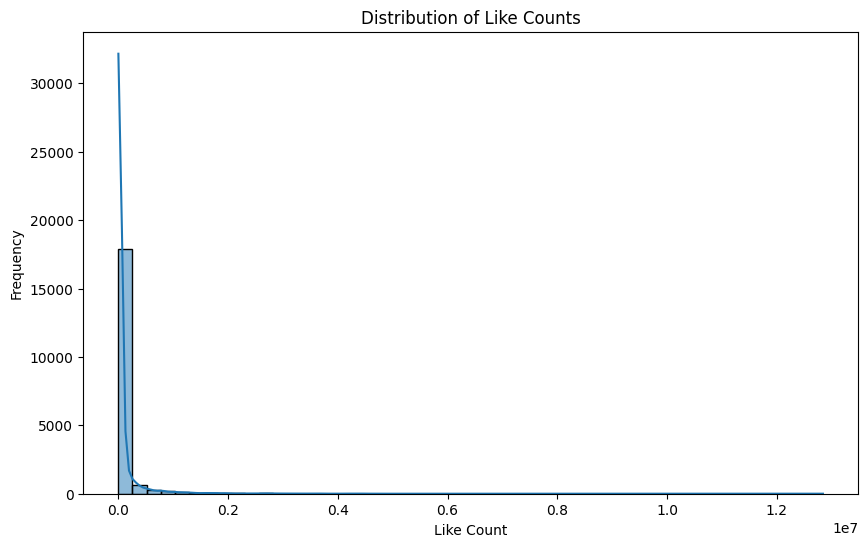

In [ ]:
# Distribution of like counts
plt.figure(figsize=(10, 6))
sns.histplot(df['likeCount'], bins=50, kde=True)
plt.title('Distribution of Like Counts')
plt.xlabel('Like Count')
plt.ylabel('Frequency')
plt.show()

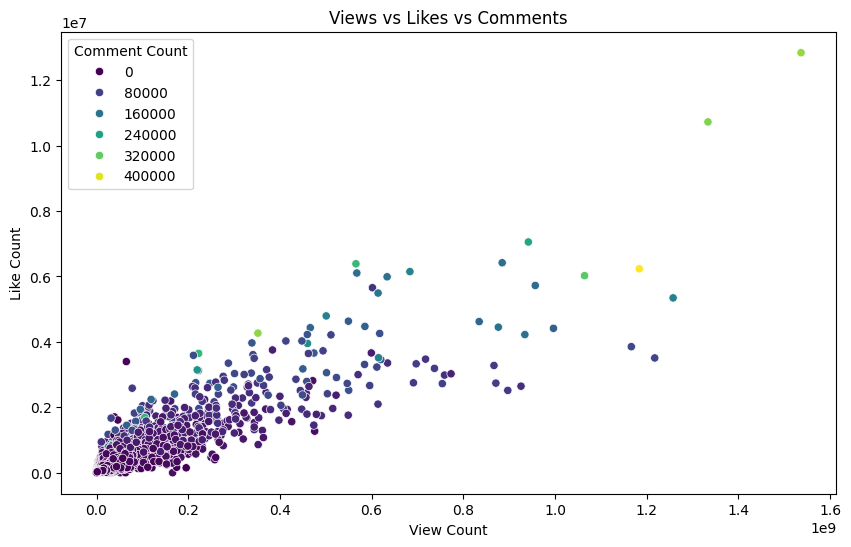

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='viewCount', y='likeCount', hue='commentCount', palette='viridis')
plt.title('Views vs Likes vs Comments')
plt.xlabel('View Count')
plt.ylabel('Like Count')
plt.legend(title='Comment Count')
plt.show()


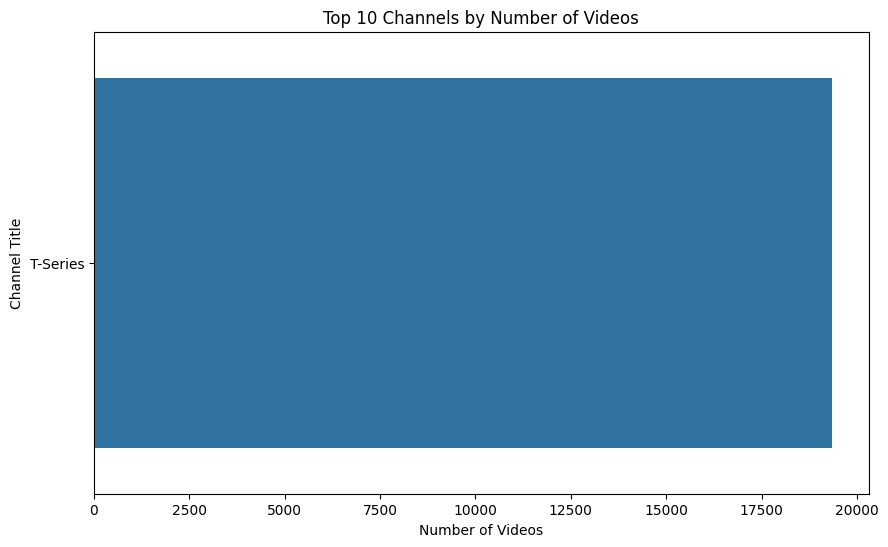

In [ ]:
top_channels = df['channelTitle'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_channels.values, y=top_channels.index)
plt.title('Top 10 Channels by Number of Videos')
plt.xlabel('Number of Videos')
plt.ylabel('Channel Title')
plt.show()

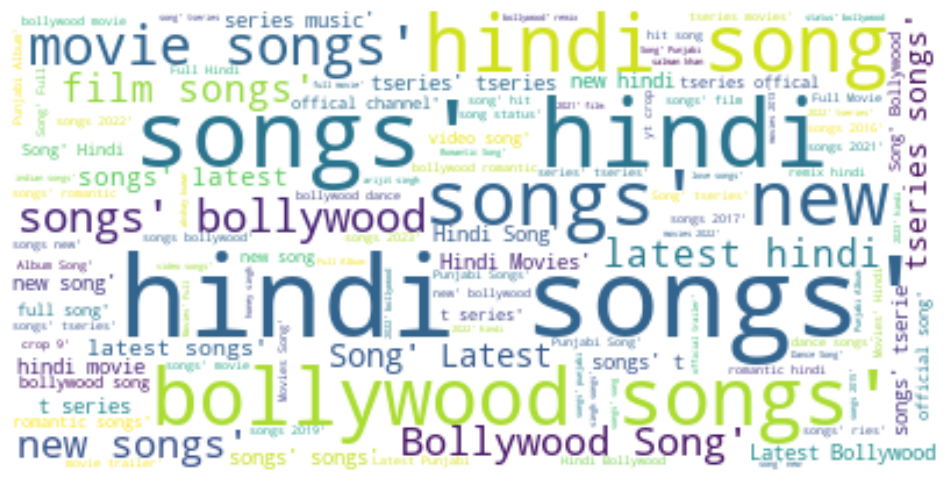

In [ ]:
text = " ".join(i for i in df.tags)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

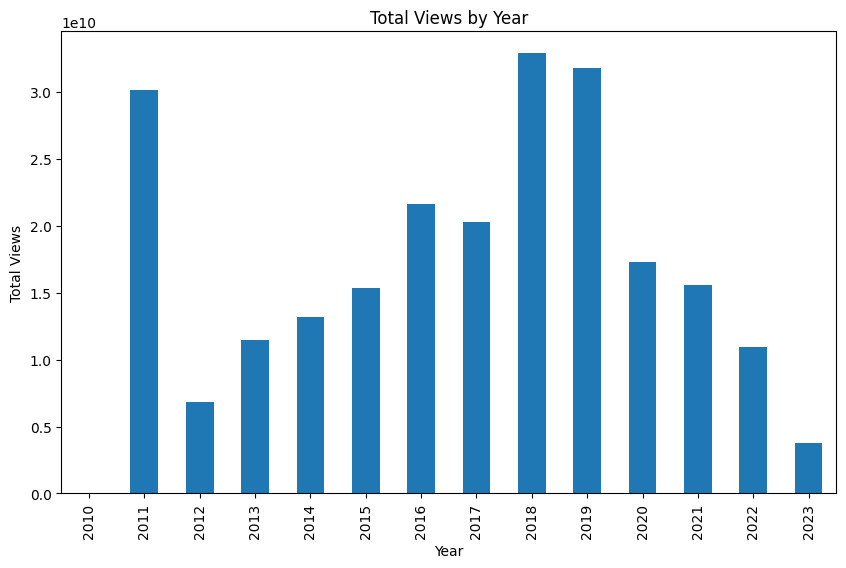

In [ ]:
df.groupby('publishedYear')['viewCount'].sum().plot(kind='bar', figsize=(10, 6))
plt.title('Total Views by Year')
plt.xlabel('Year')
plt.ylabel('Total Views')
plt.show()

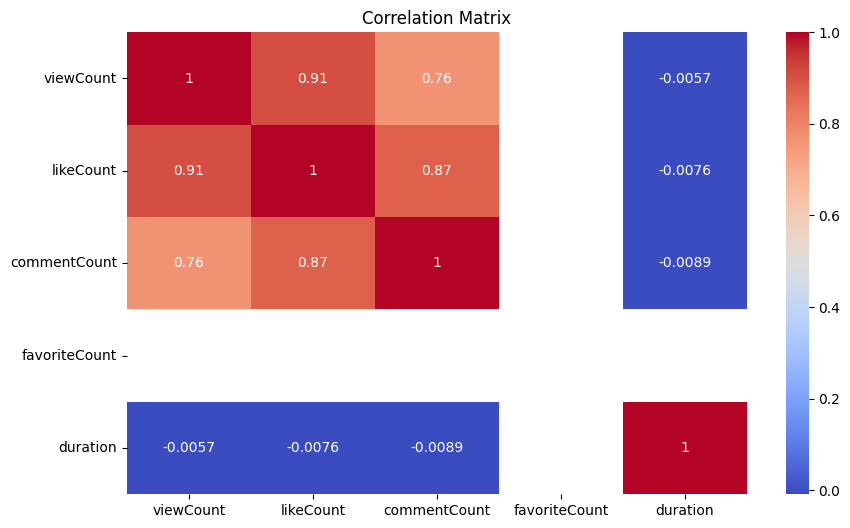

In [ ]:
corr = df[['viewCount', 'likeCount', 'commentCount', 'favoriteCount', 'duration']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
df.to_csv('cleaned_youtube_songs_data.csv', index=False)